# BoomBikes  Case Study

#### Problem Statement:

To understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Essentially, the company wants —


-Which variables are significant in predicting the demand for shared bikes.

-How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# VIF values: 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
day = pd.read_csv("Day.csv")

# Convert the 'dteday' column to datetime
day['dteday'] = pd.to_datetime(day['dteday'], format='%d-%m-%Y')
day['dd'] = day['dteday'].dt.day

In [4]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dd
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


Inspect the various aspects of the day dataframe

In [5]:
day.shape

(730, 17)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  dd          730 non-null  

# EDA

In [7]:
#EDA
day_eda=day

#Droping below fields
day_eda = day_eda.drop(['instant','dteday'],axis=1)

In [8]:
#Replaced year with values
year={0:2018,1:2019}
day_eda['yr']=day_eda['yr'].replace(year)

#Week Day
wday={0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}
day_eda['weekday']=day_eda['weekday'].replace(wday)

#Weather sit
wsit={1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Snow'}
day_eda['weathersit']=day_eda['weathersit'].replace(wsit)

#Season
wsea={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
day_eda['season']=day_eda['season'].replace(wsea)

#working/holiday
wday={0:'Holiday',1:'Working'}
day_eda['workingday']=day_eda['workingday'].replace(wday)

wday={1:'Holiday',0:'Normal'}
day_eda['holiday']=day_eda['holiday'].replace(wday)

In [9]:
day_eda.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dd
0,Spring,2018,1,Normal,Mon,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,Spring,2018,1,Normal,Tue,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,Spring,2018,1,Normal,Wed,Working,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,Spring,2018,1,Normal,Thu,Working,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,Spring,2018,1,Normal,Fri,Working,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## Step 2: Visualising the Data

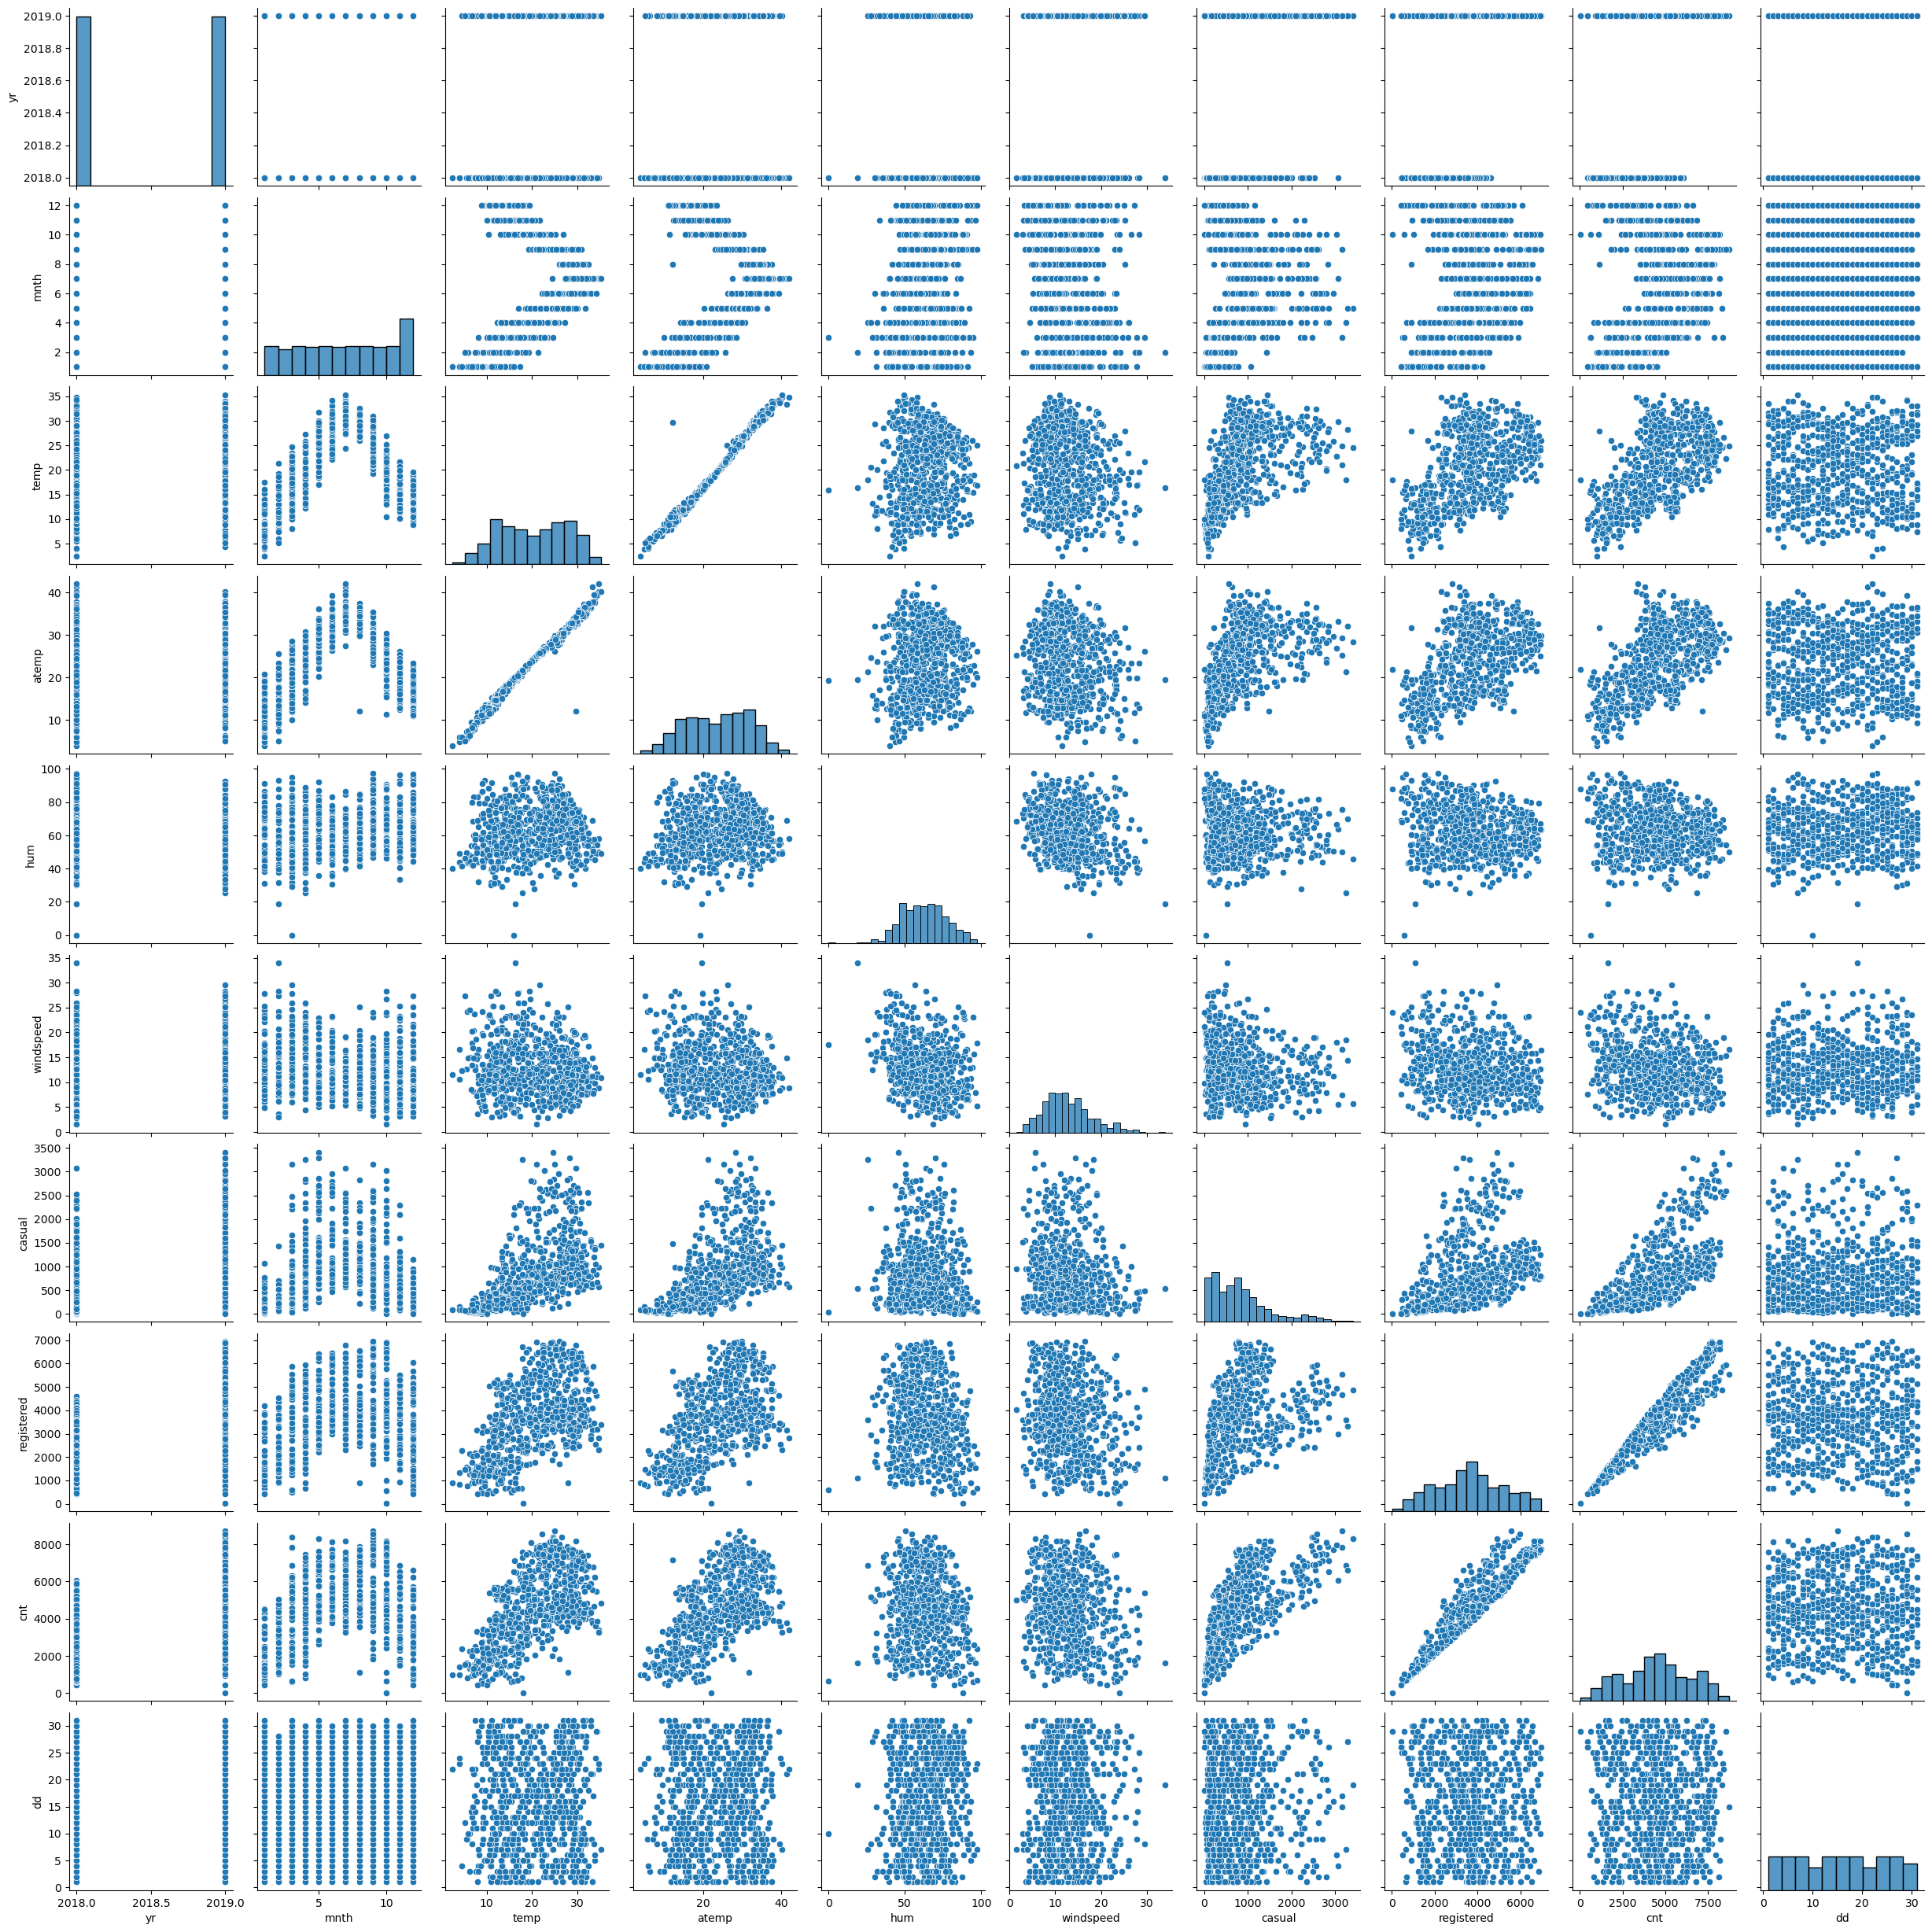

In [10]:
# Visualising Numeric Variables
sns.pairplot(day_eda)
plt.show()

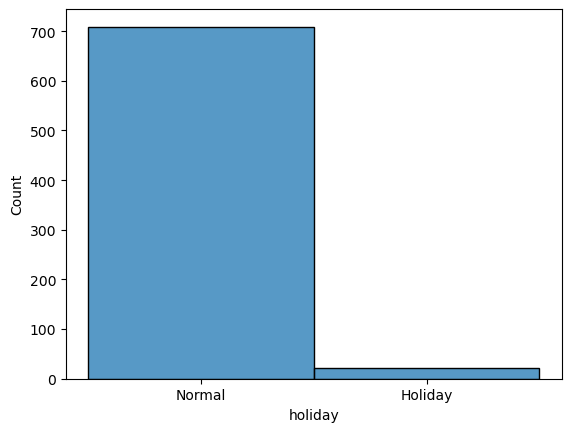

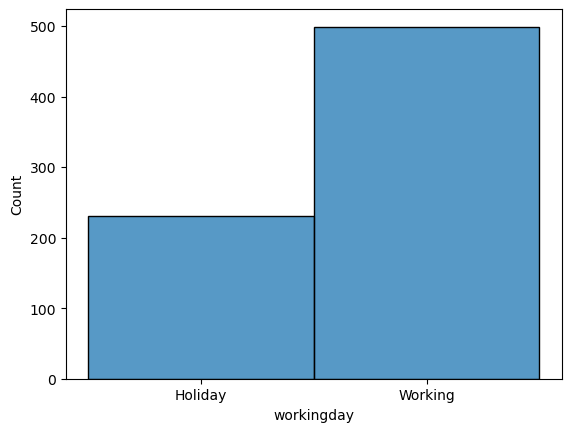

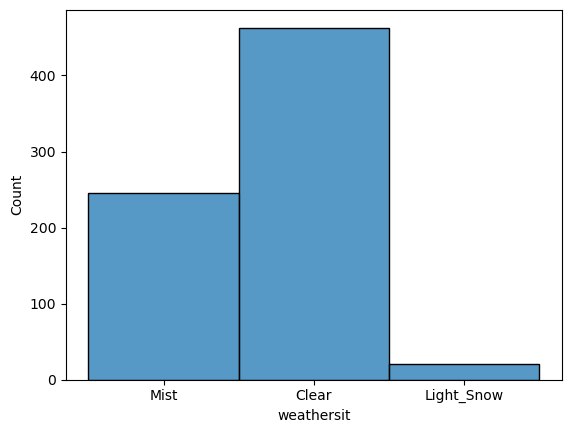

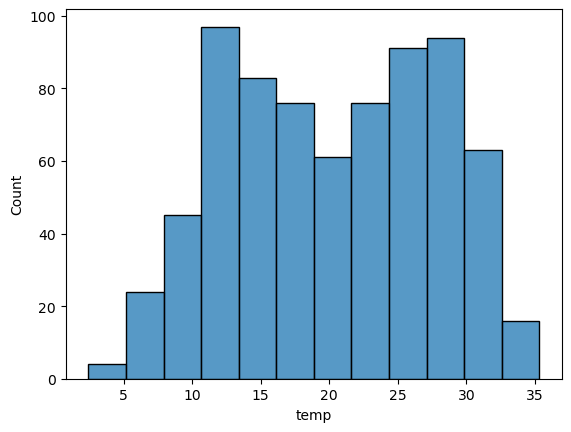

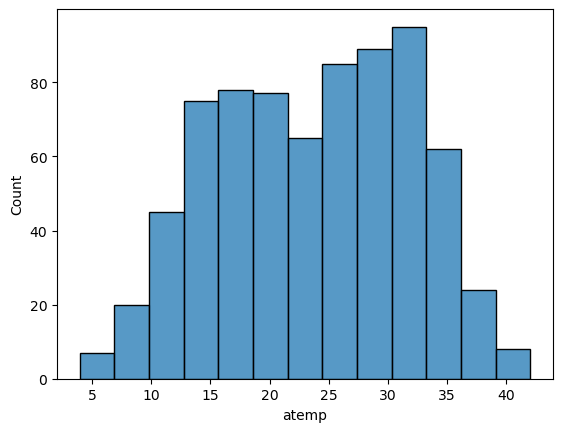

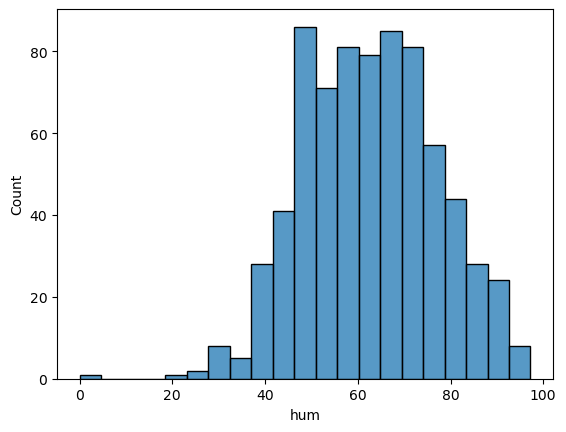

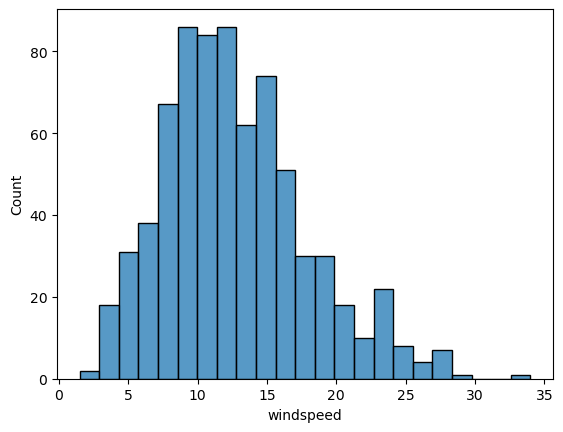

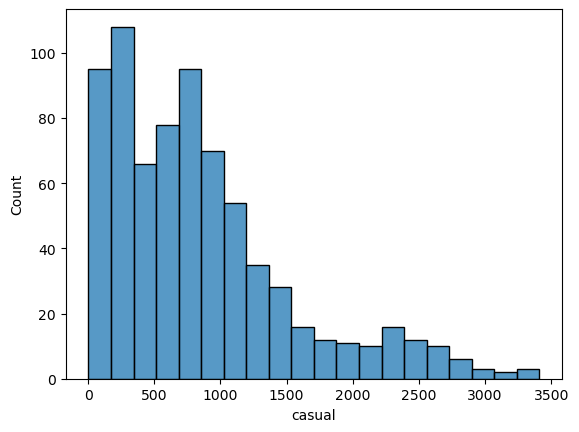

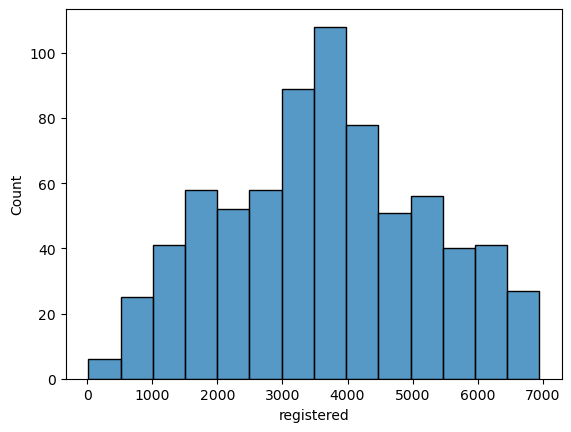

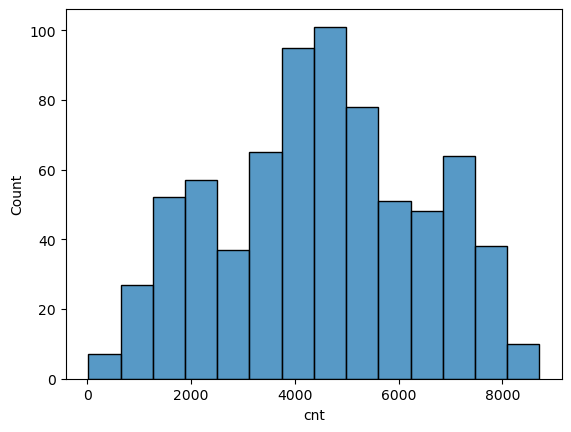

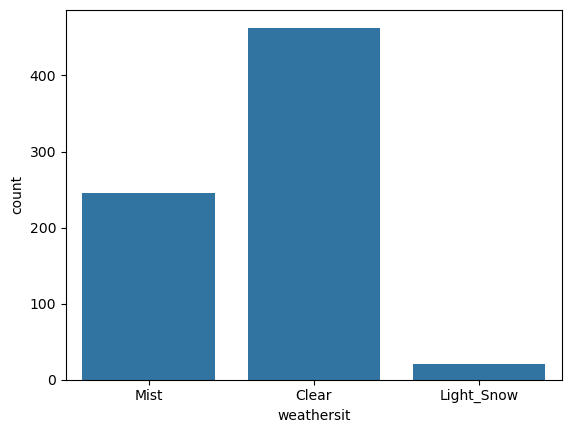

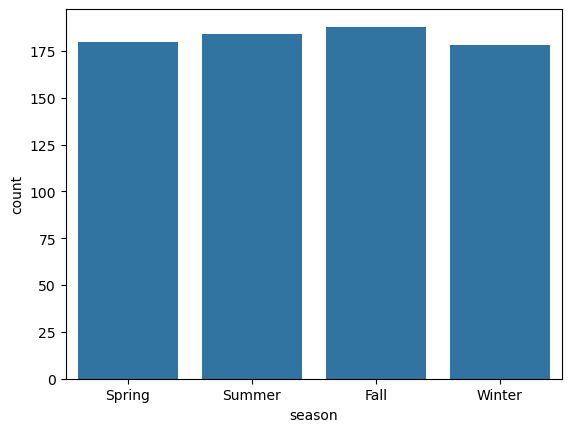

In [11]:
# Univariate Analysis
num_cols=["holiday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_cols=["weathersit",'season']
for i in num_cols:
    sns.histplot(x=day_eda[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=day_eda[i])
    plt.show()

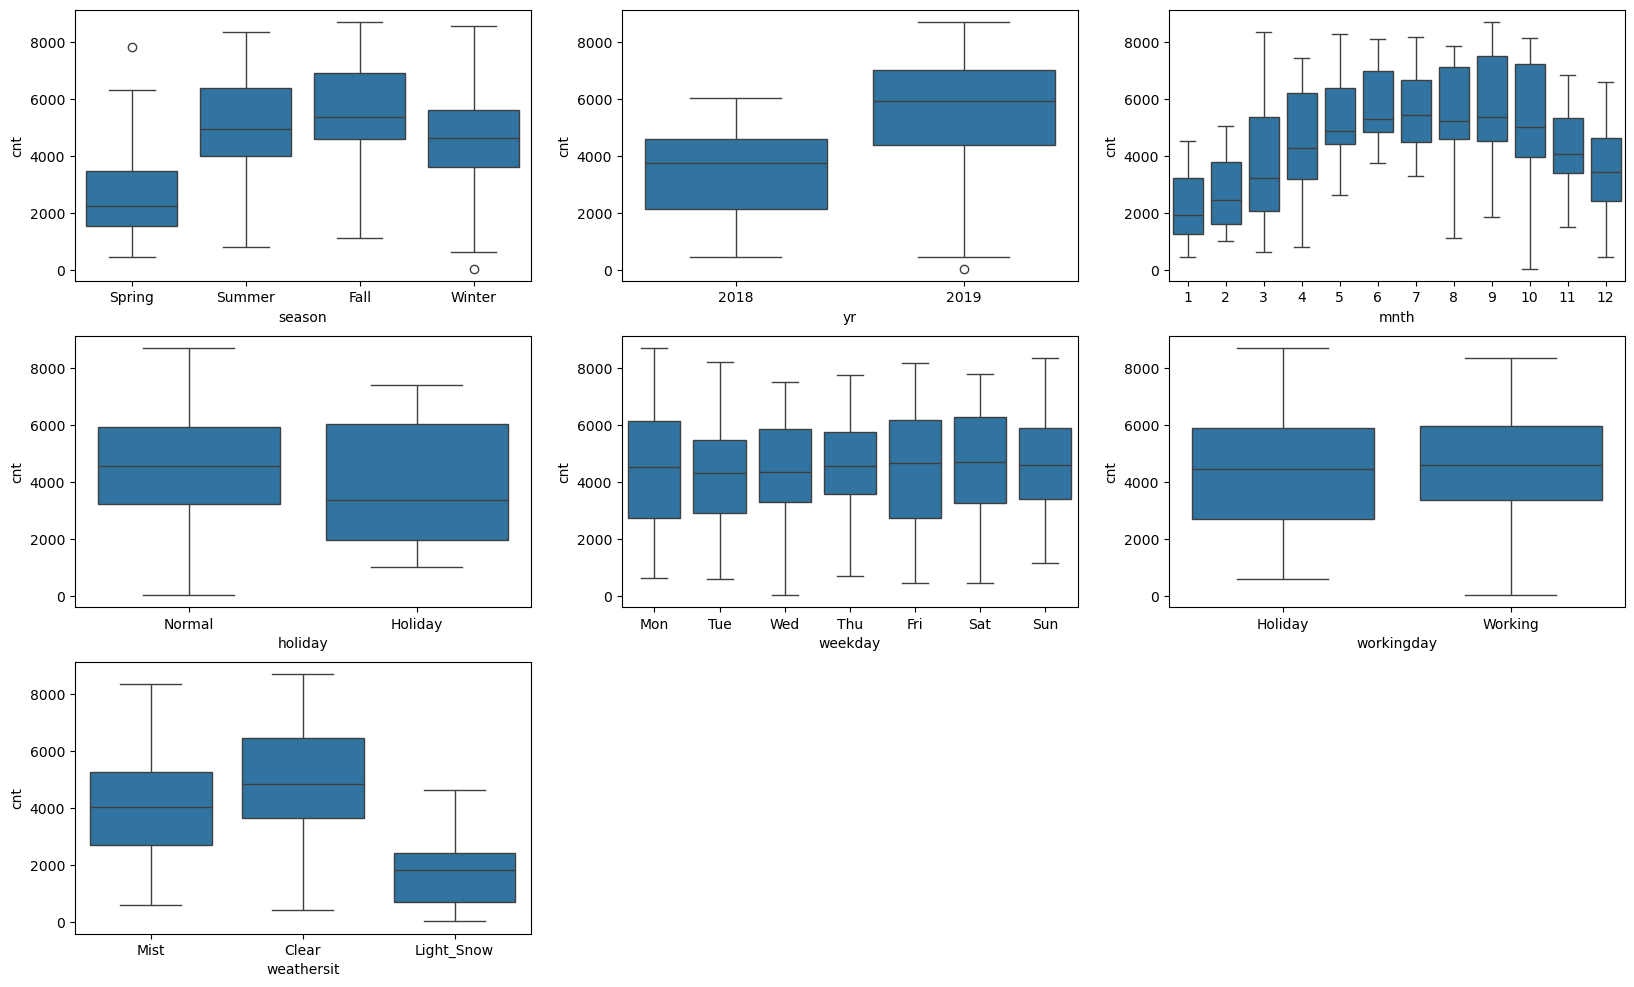

In [12]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_eda)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_eda)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_eda)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_eda)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_eda)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_eda)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_eda)
plt.show()

We can also visualise some of these categorical features parallely by using the `weathersit` argument. Below is the plot for `cnt` with `holiday` as the hue.

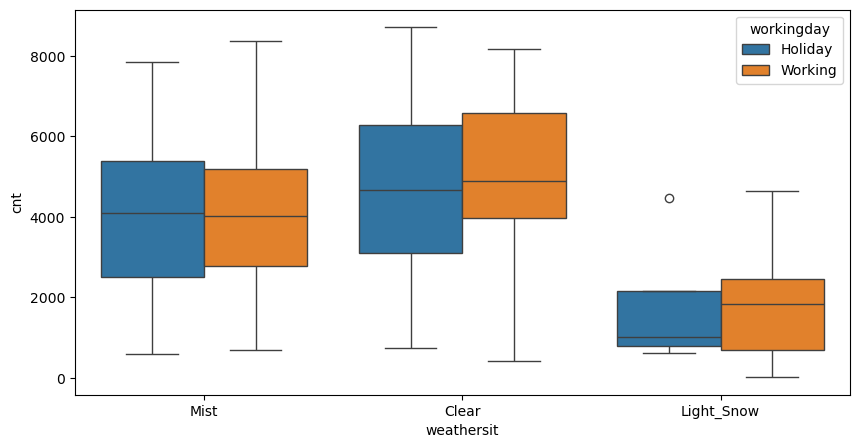

In [13]:
# Categorical features by ploting for 'Season','Weathersit' with 'Holiday'as the hue.
plt.figure(figsize = (10,5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = day_eda)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

The variable `weathersit` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [14]:
#Droping below fields as its replica of some fields
day = day.drop(['instant','dteday','casual','registered'],axis=1)

In [15]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
status = pd.get_dummies(day['weathersit']).astype(int)

In [16]:
# Check what the dataset 'status' looks like
status.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `clear`
- `01` will correspond to `mist`
- `10` will correspond to `Light Snow`

In [17]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(day['weathersit'], drop_first = True).astype(int)
status.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [18]:
# Add the results to the original day dataframe
status.columns = ['weathersit-2','weathersit-3']
day = pd.concat([day, status], axis = 1)

In [19]:
# Now let's see the head of our dataframe.

day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,0


In [20]:
# Drop 'weathersit' as we have created the dummies for it

day.drop(['weathersit'], axis = 1, inplace = True)

In [21]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,0


In [22]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(day['season']).astype(int)

In [23]:
status.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [24]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(day['season'], drop_first = True).astype(int)
status.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [25]:
# Add the results to the original day dataframe
status.columns = ['season_summer','season_fall','season_winter']
day = pd.concat([day, status], axis = 1)
day.head(100)

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,0,0,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,0,0,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0,4,0,3,1,16.024153,19.38040,47.0833,17.625221,2808,6,0,0,1,0,0
96,2,0,4,0,4,1,17.937500,21.68480,60.2917,10.874904,3141,7,0,0,1,0,0
97,2,0,4,0,5,1,13.769153,16.22395,83.6250,15.208464,1471,8,1,0,1,0,0
98,2,0,4,0,6,0,14.042500,17.07645,87.7500,8.916561,2455,9,1,0,1,0,0


In [26]:
# Drop 'season' as we have created the dummies for it

day.drop(['season'], axis = 1, inplace = True)
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
# Rescaling the Features using Min-Max scaling 
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,16,0,0,0,0,1
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,31,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,3,1,0,0,0,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,30,0,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,28,1,0,1,0,0


In [31]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,15.613725,0.343137,0.029412,0.245098,0.262745,0.24902
std,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,8.899450,0.475223,0.169124,0.430568,0.440557,0.43287
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,23.000000,1.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.00000


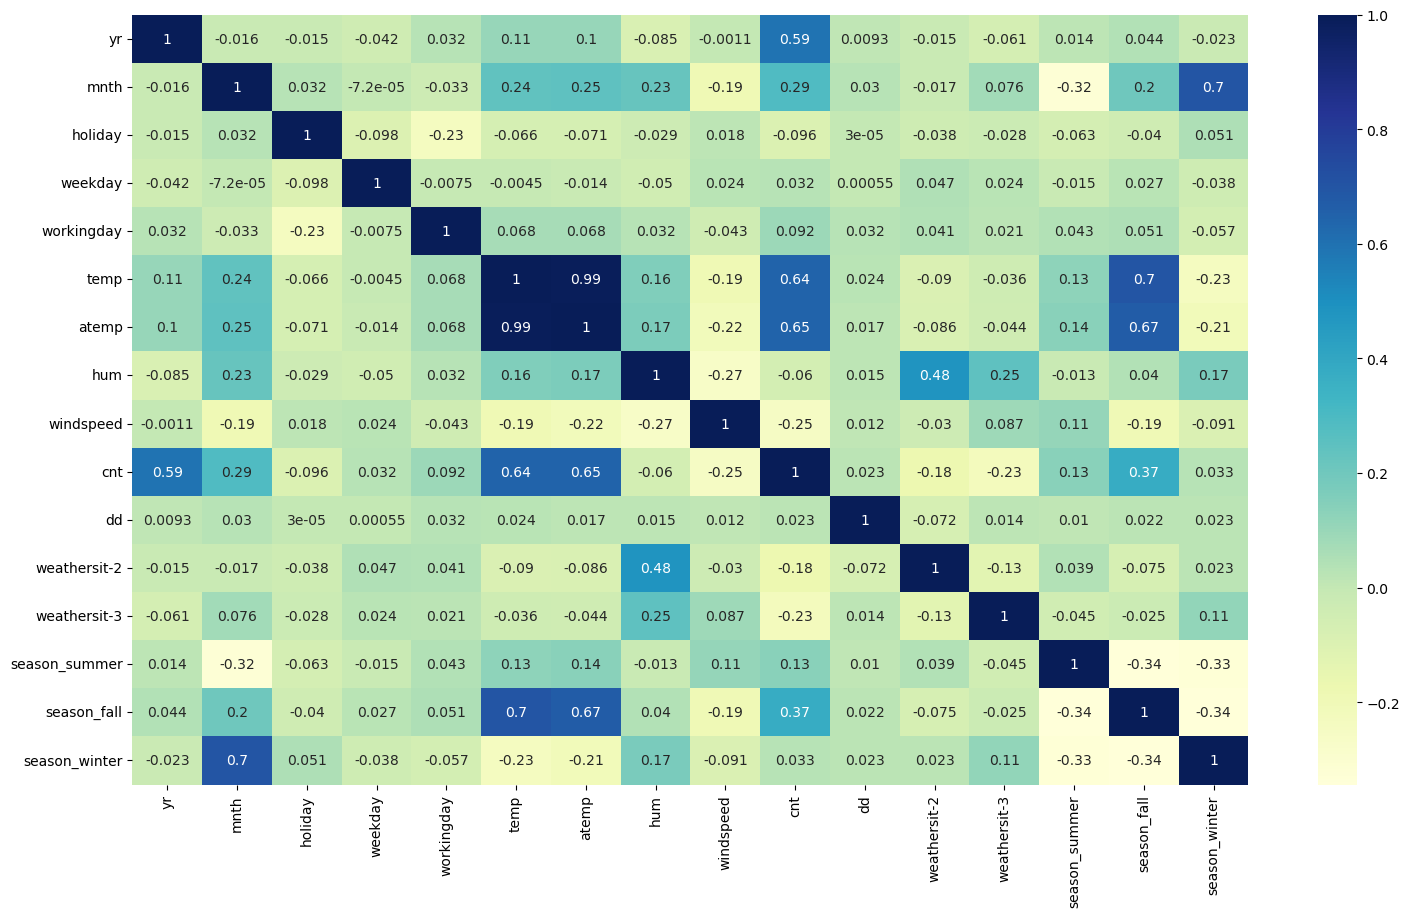

In [32]:
# Correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `cnt` seems `0.65` coefficient correlated to `atemp` which is the most

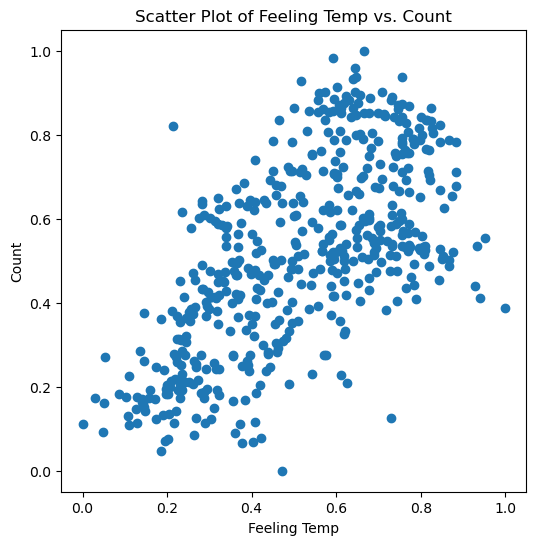

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.title('Scatter Plot of Feeling Temp vs. Count')
plt.xlabel('Feeling Temp')
plt.ylabel('Count')
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [34]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
print(Y_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64


In [36]:
print(X_train.head())

     yr  mnth  holiday  weekday  workingday      temp     atemp       hum  \
653   1    10        0        2           1  0.509887  0.501133  0.575354   
576   1     7        0        2           1  0.815169  0.766351  0.725633   
426   1     3        0        6           0  0.442393  0.438975  0.640189   
728   1    12        0        0           0  0.245101  0.200348  0.498067   
482   1     4        0        6           0  0.395666  0.391735  0.504508   

     windspeed  dd  weathersit-2  weathersit-3  season_summer  season_fall  \
653   0.300794  16             0             0              0            0   
576   0.264686  31             0             0              0            1   
426   0.255342   3             1             0              0            0   
728   0.663106  30             0             0              0            0   
482   0.188475  28             1             0              1            0   

     season_winter  
653              1  
576              0  
426  

## Step 5: Building a linear model

In [37]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(Y_train, X_train_lm).fit()

In [38]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

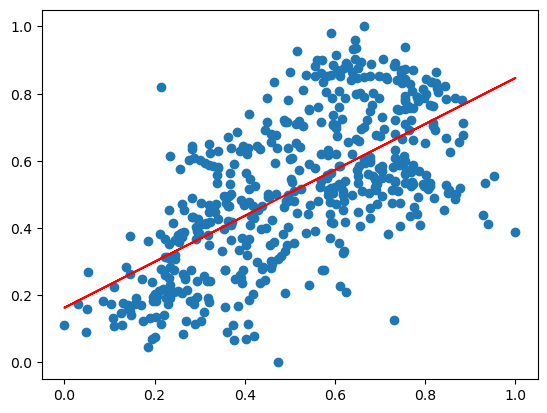

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], Y_train)
plt.plot(X_train_lm.iloc[:, 1],0.162924 + 0.683633 * X_train_lm.iloc[:, 1], 'r')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.10e-61
Time:                        23:14:21   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

###### Observation: `atemp` coefficient is statistically significant and R squared `41.8%` of variance in CNT is explained by Registered 

### Adding another variable

In [41]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [42]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(Y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [43]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.07e-131
Time:                        23:14:21   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.955` from `0.899`.
Let's go ahead and add another variable.

In [44]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr','mnth']]

In [45]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(Y_train, X_train_lm).fit()

lr.params

const    0.025188
atemp    0.583039
yr       0.240823
mnth     0.010236
dtype: float64

In [46]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     431.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.71e-139
Time:                        23:14:21   Log-Likelihood:                 362.28
No. Observations:                 510   AIC:                            -716.6
Df Residuals:                     506   BIC:                            -699.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.016      1.562      0.1

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding the variables to the model by RFE method

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('dd', False, 6),
 ('weathersit-2', True, 1),
 ('weathersit-3', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1)]

In [48]:
#Columns selected using RFE
columns = X_train.columns[rfe.support_]
print(columns)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit-2',
       'weathersit-3', 'season_summer', 'season_fall', 'season_winter'],
      dtype='object')


In [49]:
#Columns not selected using RFE
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp', 'dd'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [51]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [52]:
# Running the linear model
lm = sm.OLS(Y_train,X_train_lm).fit()

In [53]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.78e-183
Time:                        23:14:21   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2178      0.028      7.788

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

### Checking VIF

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features    VIF
2           temp  22.67
3            hum  15.02
8    season_fall   6.48
4      windspeed   3.63
7  season_summer   3.36
9  season_winter   2.48
5   weathersit-2   2.13
0             yr   2.02
6   weathersit-3   1.17
1        holiday   1.04


In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_rfe.drop(['temp'],axis=1)

In [56]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [57]:
# Running the linear model
lm = sm.OLS(Y_train,X_train_lm).fit()

In [58]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.21e-147
Time:                        23:14:21   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -776.6
Df Residuals:                     500   BIC:                            -734.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2869      0.033      8.773

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features   VIF
2            hum  9.36
3      windspeed  3.55
7    season_fall  2.21
8  season_winter  2.18
6  season_summer  2.03
0             yr  1.97
4   weathersit-2  1.96
5   weathersit-3  1.13
1        holiday  1.04


##### Require VIF <5 hence need to drop Hum

In [60]:
# Creating X_test dataframe with RFE selected variables removing Hum 
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

In [61]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [62]:
# Running the linear model
lm = sm.OLS(Y_train,X_train_lm).fit()

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.64e-148
Time:                        23:14:21   Log-Likelihood:                 398.32
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     501   BIC:                            -740.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2840      0.016     17.254

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features   VIF
2      windspeed  2.59
0             yr  1.88
5  season_summer  1.61
7  season_winter  1.50
3   weathersit-2  1.45
6    season_fall  1.45
4   weathersit-3  1.08
1        holiday  1.03


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
Y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [66]:
Y_train_pred= lm.predict(X_train_lm)

<Axes: ylabel='Density'>

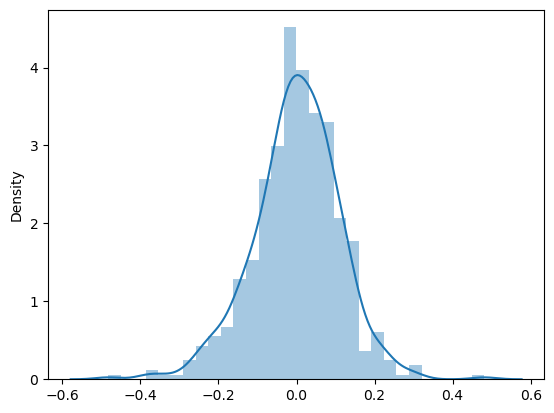

In [67]:
# Plot the histogram of the error terms
res=Y_train-Y_train_pred
sns.distplot(res)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [68]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [69]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,16.018265,0.319635,0.027397,0.264840,0.246575,0.232877
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,8.575067,0.467403,0.163612,0.442259,0.432005,0.423633
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [70]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,dd,weathersit-2,weathersit-3,season_summer,season_fall,season_winter
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,4,1,0,0,1,0
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,20,0,0,1,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,27,1,0,0,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,10,0,0,0,1,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,2,0,0,1,0,0


In [71]:
Y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Adding constant variable to test dataframe
X_test_lm= sm.add_constant(X_test)

In [73]:
X_test_lm = X_test_lm.drop(['mnth','weekday','workingday','atemp','dd','temp','hum'], axis = 1)

In [74]:
# Making predictions

Y_pred_lm= lm.predict(X_test_lm)

In [75]:
#Evaluate
r2_score(y_true=Y_test,y_pred=Y_pred_lm)

0.7367319609687297

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

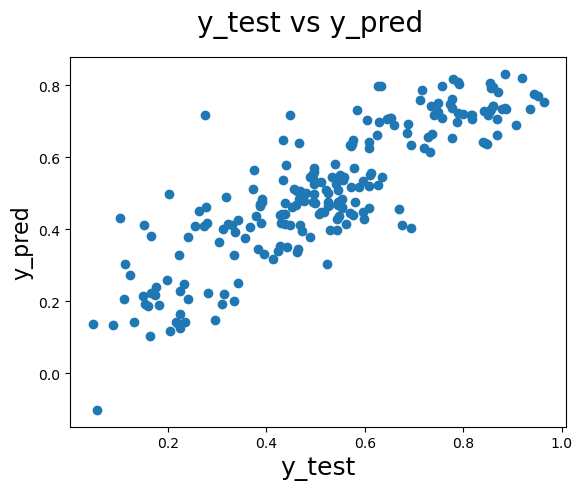

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ CNT = 0.247 \times Year + 0.254  \times  Season Summer + 0.314 \times Season_Fall + 0.227 \times Season Winter -0.093 \times Holiday -0.176 \times WindSpeed -0.087 \times Weathersit 2 -0.291 \times Weathersit 3 $


Overall we have a decent model for CNT dependent variable. 